<a href="https://colab.research.google.com/github/AmirHoseein99/Movie_Writer/blob/master/MoviePlotGen_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! unzip "/content/drive/MyDrive/Colab Notebooks/MoviePlotGenerator/wiki_movie_plots_deduped.csv.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/MoviePlotGenerator/wiki_movie_plots_deduped.csv.zip
  inflating: wiki_movie_plots_deduped.csv  


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv("/content/wiki_movie_plots_deduped.csv")
print(20 * '*' + f"{data_df.shape}" + 20 * '*')
data_df.head()

********************(34886, 8)********************


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


Top 30 Genre based on number of moives 

In [ ]:
each_genre_count = data_df.Genre.value_counts()[:25].to_frame()
each_genre_count.head()

,Genre
unknown,6083
drama,5964
comedy,4379
horror,1167
action,1098


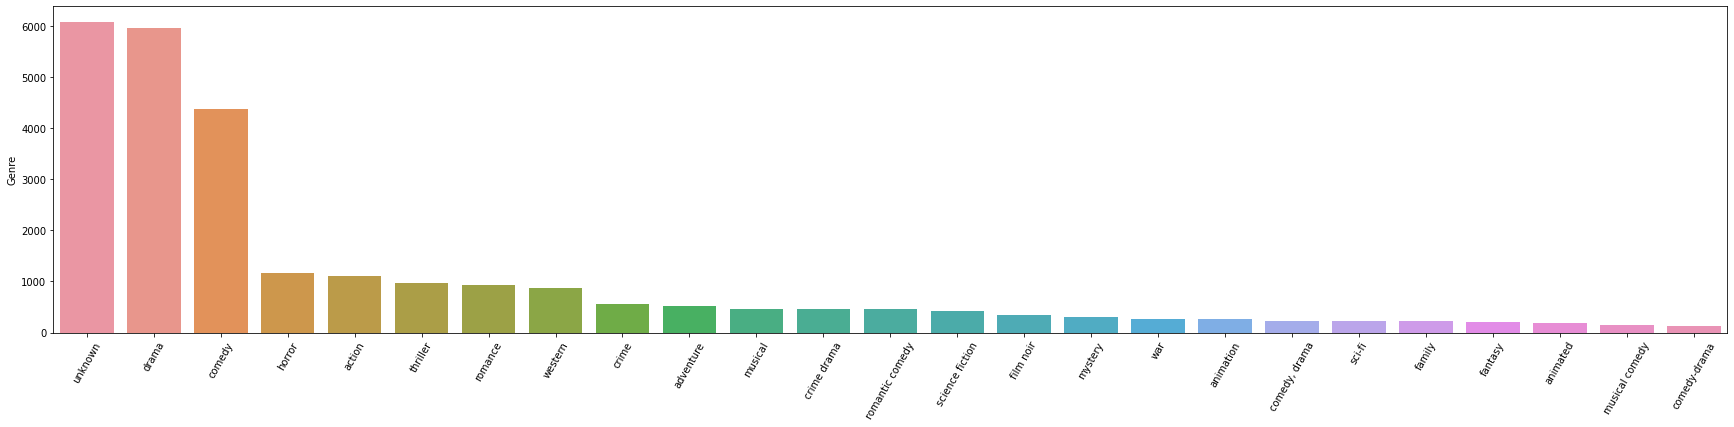

In [ ]:
plt.figure(figsize=(30, 6))
sns.barplot(x=each_genre_count.index, y=each_genre_count.Genre)
_ = plt.xticks(rotation=60)

Number of Movies in Top five Gener in every Country

In [ ]:
origin_genre = data_df.groupby('Origin/Ethnicity')['Genre'].value_counts().groupby(level=0).head(5)
origin_genre

Origin/Ethnicity  Genre       
American          drama           3549
                  comedy          3059
                  western          855
                  horror           782
                  action           495
                                  ... 
Turkish           drama             32
                  comedy            13
                  unknown           11
                  comedy-drama       3
                  action             2
Name: Genre, Length: 115, dtype: int64

getting rid of origins with little movies

In [ ]:
drop_group = [index for index in  origin_genre.groupby(level=0).sum().index if origin_genre.groupby(level=0).sum()[index] <400]
origin_genre.drop(drop_group, inplace=True)

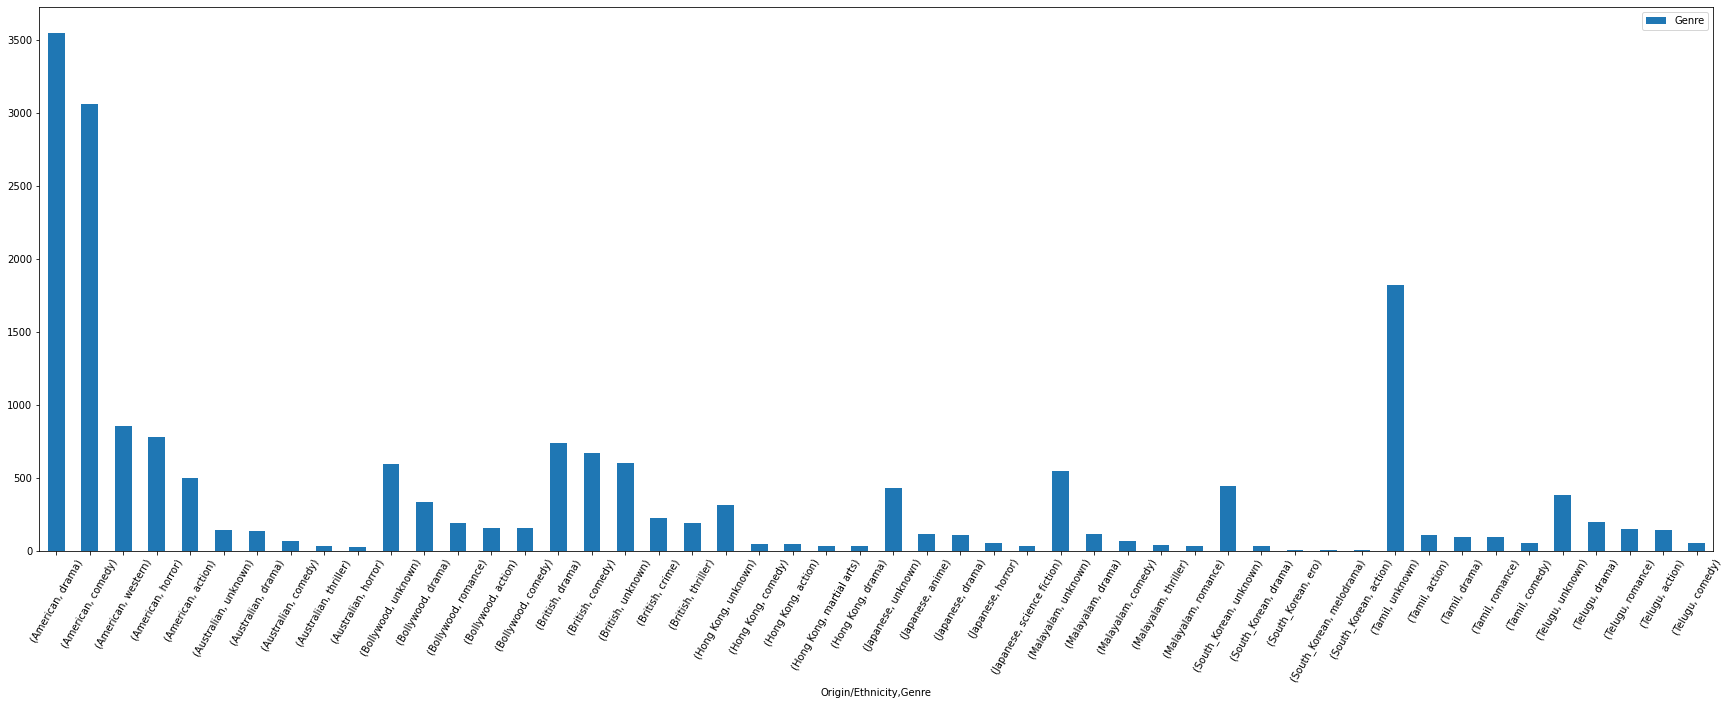

In [ ]:
_ = origin_genre.plot(legend=True, figsize=(30, 10), kind='bar', rot=60)

Top 30 Years based on the number of moives and the top genre for each year

In [6]:
each_year_count = data_df['Release Year'].value_counts()[:30]
each_year_count.head()

2013    1021
2014     929
2012     874
2011     858
2010     825
Name: Release Year, dtype: int64

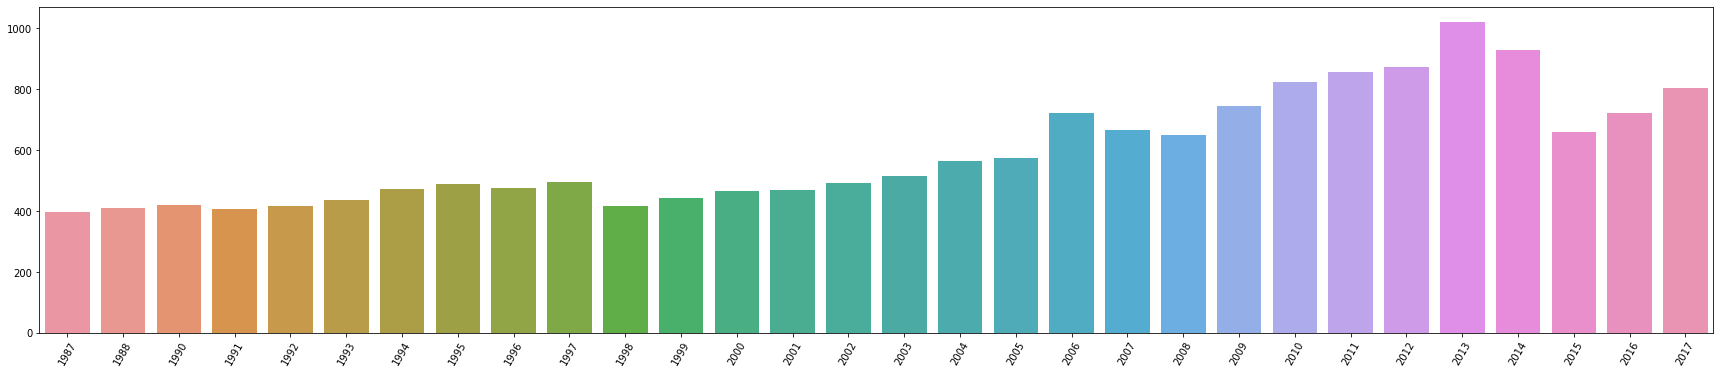

In [ ]:
plt.figure(figsize=(30, 6))
sns.barplot(x=each_year_count.index, y=each_year_count.values)
_ = plt.xticks(rotation=60)

In [ ]:
data_df[data_df['Release Year'].isin(each_year_count.index)].groupby('Release Year')['Genre'].value_counts().groupby(level=0).head(1)

Release Year  Genre  
1987          unknown     81
1988          drama       80
1990          unknown    113
1991          unknown    118
1992          unknown    144
1993          unknown    145
1994          unknown    149
1995          unknown    163
1996          drama      111
1997          unknown    125
1998          unknown     88
1999          unknown    101
2000          unknown     94
2001          unknown    112
2002          unknown    119
2003          unknown    127
2004          unknown    126
2005          unknown    147
2006          drama      115
2007          drama      116
2008          drama       86
2009          drama      111
2010          unknown    154
2011          drama      139
2012          unknown    176
2013          unknown    199
2014          unknown    214
2015          unknown    129
2016          unknown    163
2017          unknown    193
Name: Genre, dtype: int64

first genre was not very informative, so we get the second top genre too.


In [17]:
top_years_top_genre = data_df[data_df['Release Year'].isin(each_year_count.index)].groupby('Release Year')['Genre'].value_counts().groupby(level=0).head(2).to_frame()
top_years_top_genre.columns = ['count']
top_years_top_genre.reset_index(inplace=True)
top_years_top_genre.head()

,Release Year,Genre,count
0,1987,unknown,81
1,1987,comedy,76
2,1988,drama,80
3,1988,unknown,75
4,1990,unknown,113


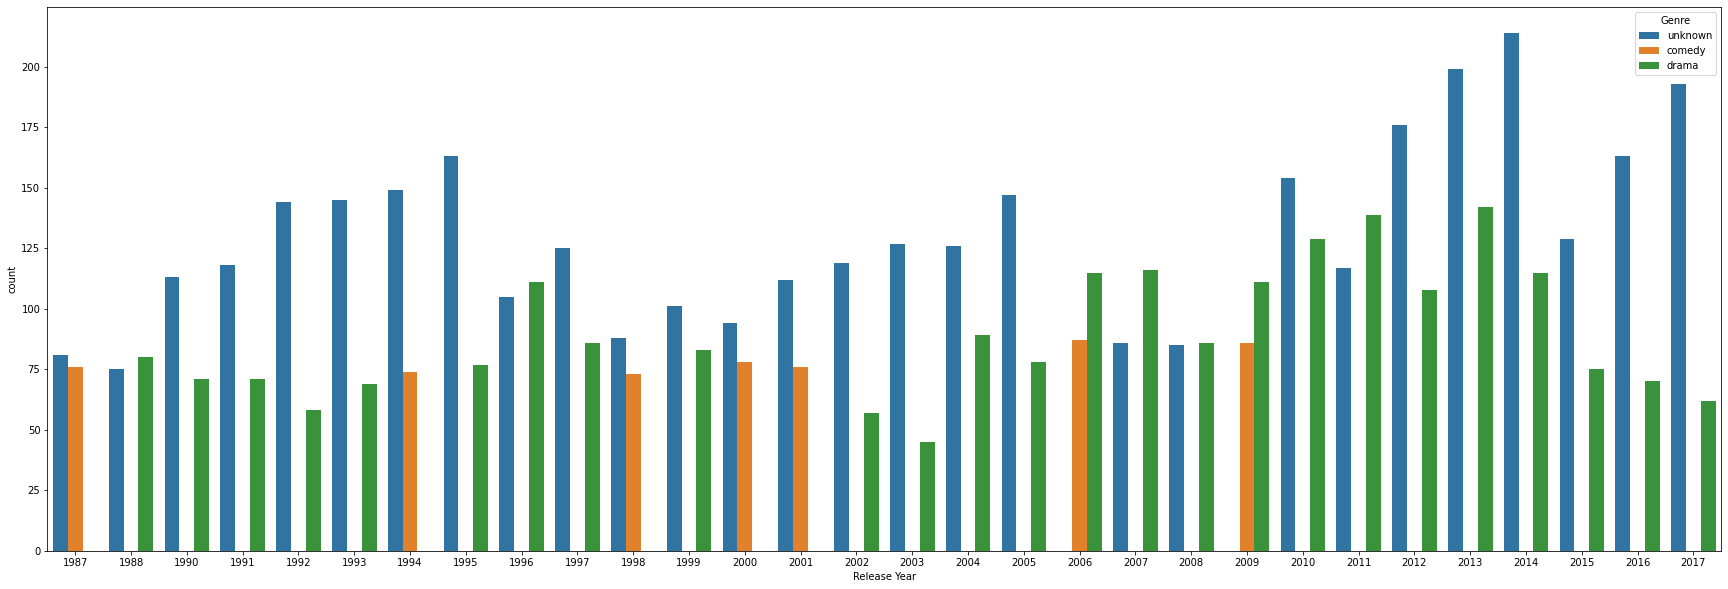

In [8]:
plt.figure(figsize=(30, 10))
_ = sns.barplot(data =top_years_top_genre,  x="Release Year", y='count', hue='Genre')

Top 30 Directors based on the number of moives and the top genre for each of them

In [12]:
each_dir_count = data_df['Director'].value_counts()[1:31]
each_dir_count.head()

Michael Curtiz    79
Hanna-Barbera     77
Lloyd Bacon       66
Jules White       63
John Ford         59
Name: Director, dtype: int64

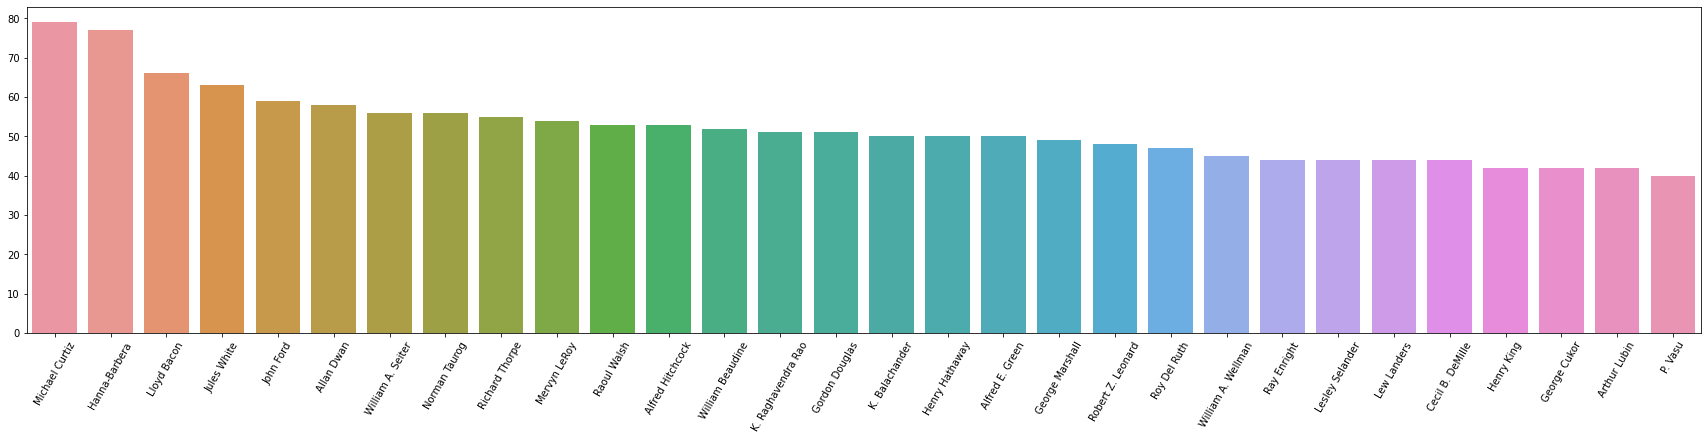

In [13]:
plt.figure(figsize=(30, 6))
sns.barplot(x=each_dir_count.index, y=each_dir_count.values)
_ = plt.xticks(rotation=60)

In [16]:
data_df[data_df['Director'].isin(each_dir_count.index)].groupby('Director')['Genre'].value_counts().groupby(level=0).head(3)

Director            Genre    
Alfred E. Green     drama        16
                    comedy        9
                    biography     3
Alfred Hitchcock    drama        14
                    suspense     12
                                 ..
William A. Wellman  western       6
                    comedy        4
William Beaudine    comedy       20
                    drama         7
                    mystery       5
Name: Genre, Length: 90, dtype: int64

In [21]:
top_directors_top_genre = data_df[data_df['Director'].isin(each_dir_count.index)].groupby('Director')['Genre'].value_counts().groupby(level=0).head(2).to_frame()
top_directors_top_genre.columns = ['count']
top_directors_top_genre.reset_index(inplace=True)
top_directors_top_genre.head()

,Director,Genre,count
0,Alfred E. Green,drama,16
1,Alfred E. Green,comedy,9
2,Alfred Hitchcock,drama,14
3,Alfred Hitchcock,suspense,12
4,Allan Dwan,comedy,14


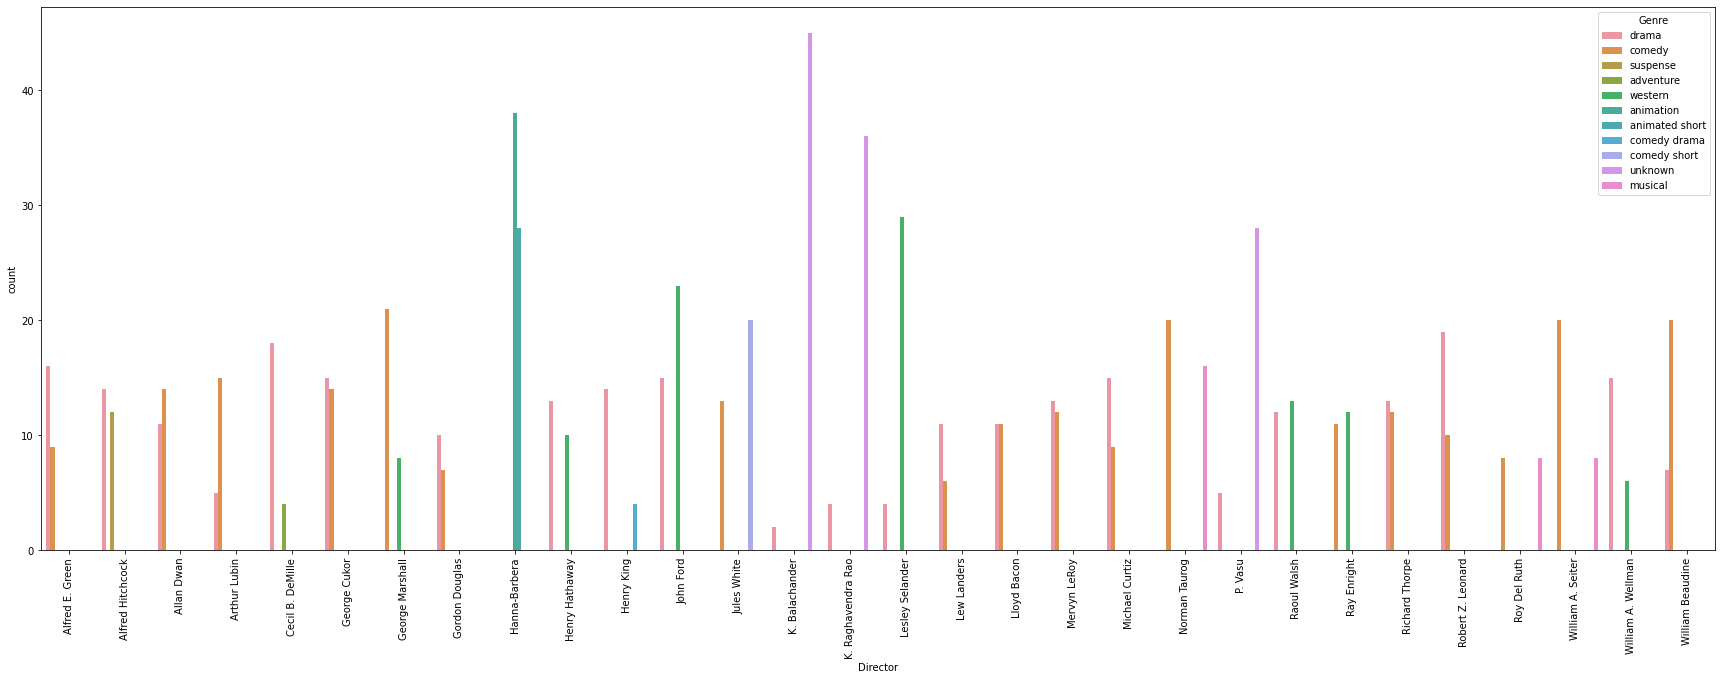

In [25]:
plt.figure(figsize=(30, 10))
_ = sns.barplot(data =top_directors_top_genre,  x="Director", y='count', hue='Genre')
_ = plt.xticks(rotation=90)

# Most used words in top genres

In [ ]:
import re
import nltk
nltk.download('stopwords')
from operator import itemgetter
from nltk.corpus import stopwords
stop_words =set(stopwords.words('english'))
from collections import Counter, OrderedDict

Drama


In [ ]:
words_counts = Counter()

for plot in data_df[data_df["Genre"] == "drama"].Plot.values:
    words_counts.update(re.findall('\w+', plot.lower()))


orderd_word_counts = OrderedDict(sorted(words_counts.items(), key=itemgetter(1)))
orderd_word_counts

In [ ]:
top_100_words = list(orderd_word_counts.keys())[-100:]
top_100_words

In [77]:
drama_top_words = pd.DataFrame([(x, orderd_word_counts[x]) for x in top_100_words if x not in stop_words], columns=["words", 'counts'])
drama_top_words.head()

,words,counts
0,first,1861
1,find,1865
2,friend,1893
3,old,1896
4,take,1923


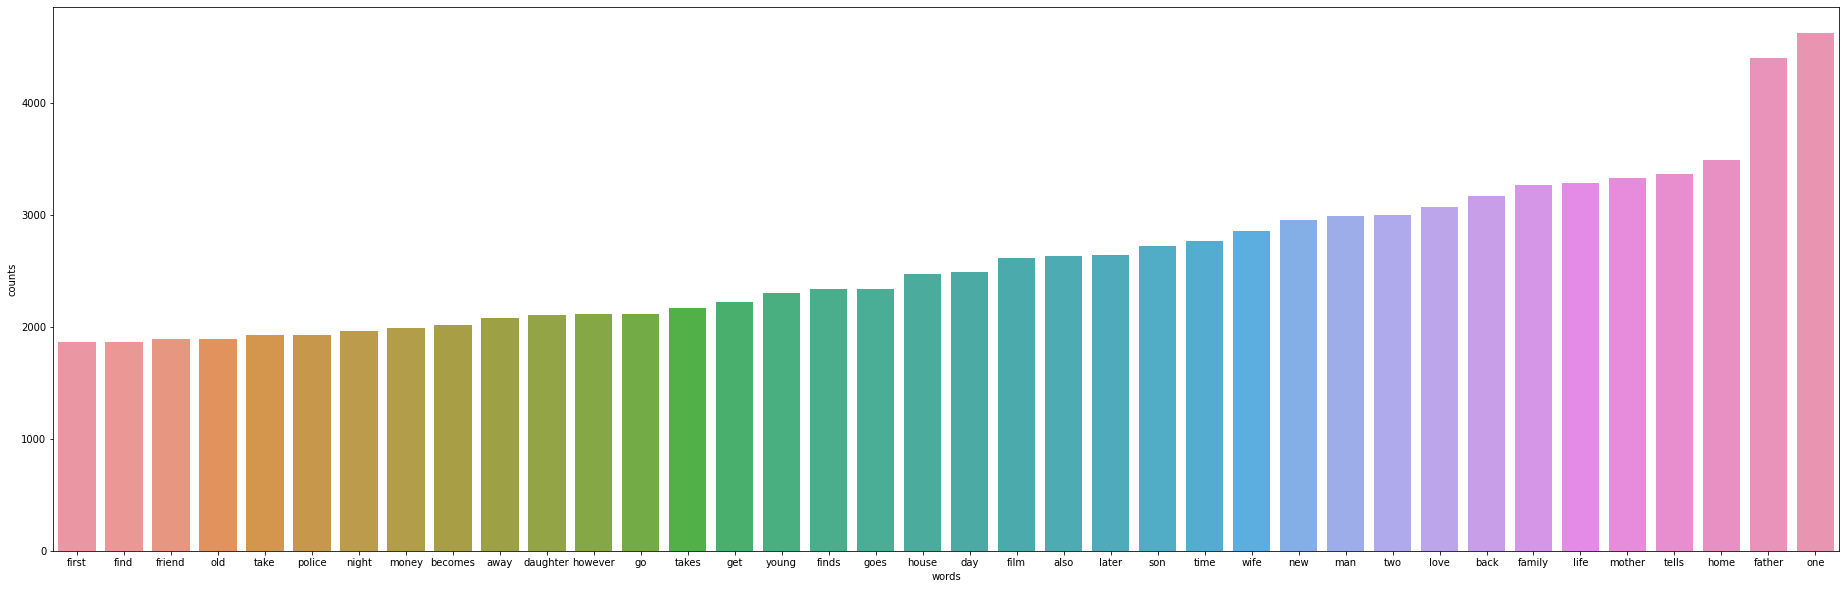

In [92]:
plt.figure(figsize=(32, 10))
_ = sns.barplot(data =drama_top_words,  x="words", y='counts')

comedy

In [83]:
words_counts = Counter()

for plot in data_df[data_df["Genre"] == "comedy"].Plot.values:
    words_counts.update(re.findall('\w+', plot.lower()))

orderd_word_counts = OrderedDict(sorted(words_counts.items(), key=itemgetter(1)))
top_100_words = list(orderd_word_counts.keys())[-100:]
comedy_top_words = pd.DataFrame([(x, orderd_word_counts[x]) for x in top_100_words if x not in stop_words], columns=["words", 'counts'])
comedy_top_words.head()

,words,counts
0,next,1400
1,decides,1446
2,help,1459
3,first,1463
4,school,1484


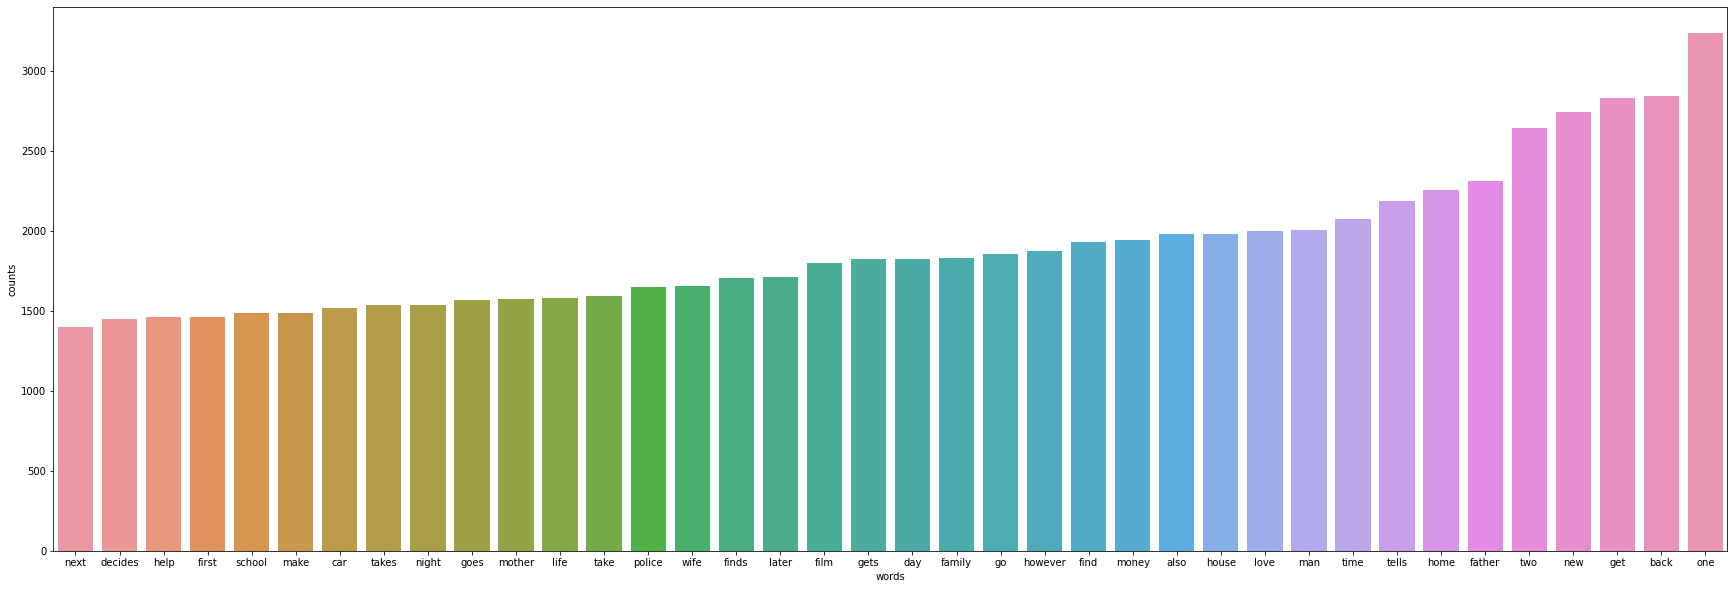

In [90]:
plt.figure(figsize=(30, 10))
_ = sns.barplot(data =comedy_top_words,  x="words", y='counts')

horror

In [86]:
words_counts = Counter()

for plot in data_df[data_df["Genre"] == "horror"].Plot.values:
    words_counts.update(re.findall('\w+', plot.lower()))

orderd_word_counts = OrderedDict(sorted(words_counts.items(), key=itemgetter(1)))
top_100_words = list(orderd_word_counts.keys())[-100:]
horor_top_words = pd.DataFrame([(x, orderd_word_counts[x]) for x in top_100_words if x not in stop_words], columns=["words", 'counts'])
horor_top_words.head()

,words,counts
0,time,553
1,escape,556
2,woman,557
3,go,579
4,day,580


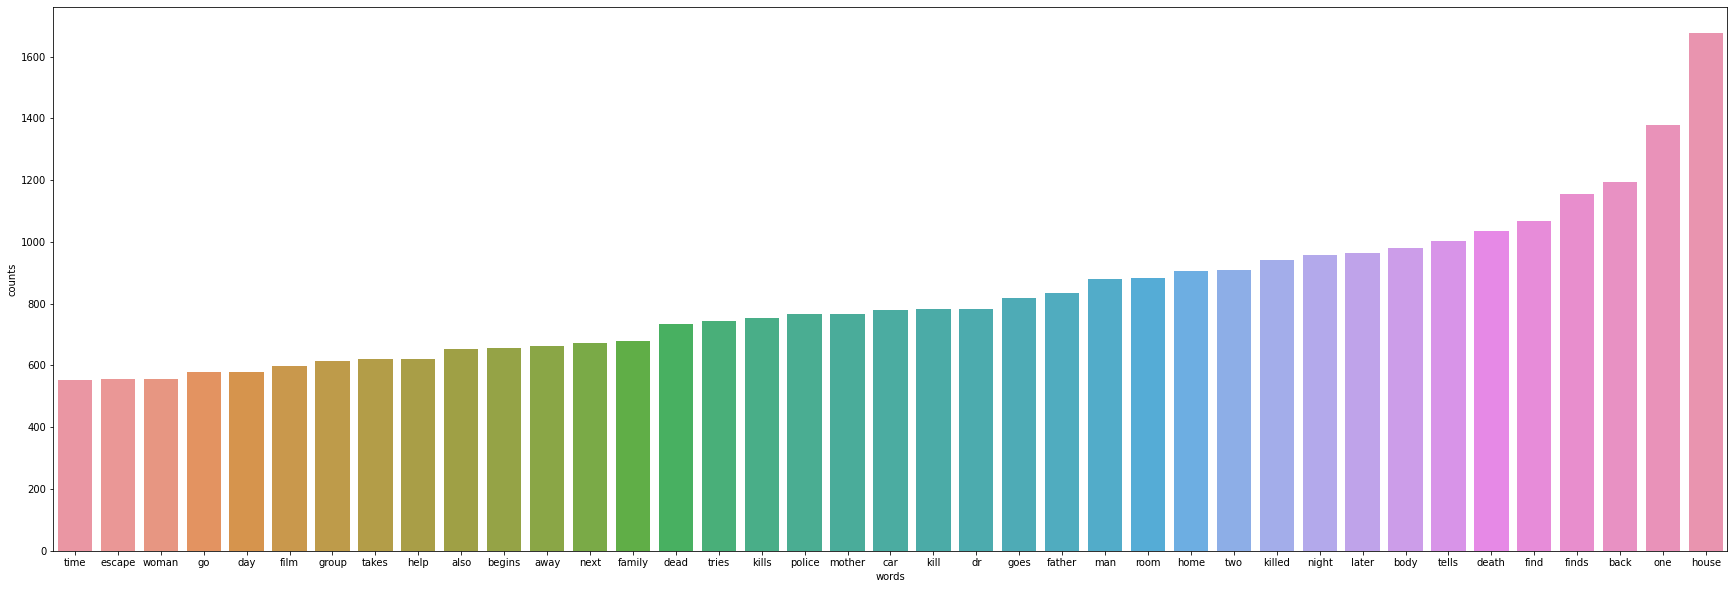

In [89]:
plt.figure(figsize=(30, 10))
_ = sns.barplot(data =horor_top_words,  x="words", y='counts')